# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Цель исследования:**

Ответить на вопросы: 
* Есть ли зависимость между количеством детей и возвратом кредита в срок?
* Есть ли зависимость между семейным положением и возвратом кредита в срок?
* Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
* Как разные цели кредита влияют на его возврат в срок?

**План исследования:**

* Проверить данные на пропуски и заполнить их;
* Проверить типы данных;
* Поработать с дубликатами;
* Выделить леммы;
* Категоризировать данные;
* Выявить зависимости возврата кредита вовремя от признаков;
* Сделать общий вывод.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Проверка-на-аномалии" data-toc-modified-id="Проверка-на-аномалии-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверка на аномалии</a></span><ul class="toc-item"><li><span><a href="#Столбец-dob_years" data-toc-modified-id="Столбец-dob_years-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Столбец dob_years</a></span></li><li><span><a href="#Столбец-children" data-toc-modified-id="Столбец-children-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Столбец children</a></span></li><li><span><a href="#Столбецы-education-и-education_id" data-toc-modified-id="Столбецы-education-и-education_id-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Столбецы education и education_id</a></span></li><li><span><a href="#Столбецы-family_status-и-family_status_id" data-toc-modified-id="Столбецы-family_status-и-family_status_id-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Столбецы family_status и family_status_id</a></span></li><li><span><a href="#Столбец-gender" data-toc-modified-id="Столбец-gender-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>Столбец gender</a></span></li><li><span><a href="#Столбец-income_type" data-toc-modified-id="Столбец-income_type-2.2.6"><span class="toc-item-num">2.2.6&nbsp;&nbsp;</span>Столбец income_type</a></span></li><li><span><a href="#Столбец-debt" data-toc-modified-id="Столбец-debt-2.2.7"><span class="toc-item-num">2.2.7&nbsp;&nbsp;</span>Столбец debt</a></span></li><li><span><a href="#Столбец-purpose" data-toc-modified-id="Столбец-purpose-2.2.8"><span class="toc-item-num">2.2.8&nbsp;&nbsp;</span>Столбец purpose</a></span></li></ul></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Категоризация-данных" data-toc-modified-id="Категоризация-данных-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Категоризация данных</a></span></li><li><span><a href="#Результат-предобработки-данных" data-toc-modified-id="Результат-предобработки-данных-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Результат предобработки данных</a></span></li></ul></li><li><span><a href="#Ответы-на-вопросы" data-toc-modified-id="Ответы-на-вопросы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ответы на вопросы</a></span><ul class="toc-item"><li><span><a href="#Зависимость-между-наличием-детей-и-возвратом-кредита-в-срок." data-toc-modified-id="Зависимость-между-наличием-детей-и-возвратом-кредита-в-срок.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Зависимость между наличием детей и возвратом кредита в срок.</a></span></li><li><span><a href="#Зависимость-между-семейным-положением-и-возвратом-кредита-в-срок" data-toc-modified-id="Зависимость-между-семейным-положением-и-возвратом-кредита-в-срок-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Зависимость между семейным положением и возвратом кредита в срок</a></span></li><li><span><a href="#Зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок" data-toc-modified-id="Зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Зависимость между уровнем дохода и возвратом кредита в срок</a></span></li><li><span><a href="#Как-разные-цели-кредита-влияют-на-его-возврат-в-срок?" data-toc-modified-id="Как-разные-цели-кредита-влияют-на-его-возврат-в-срок?-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Как разные цели кредита влияют на его возврат в срок?</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Обзор данных

In [1]:
#импорт необходимых библиотек
import pandas as pd
import numpy as np
import seaborn
from pymystem3 import Mystem
m = Mystem()
from collections import Counter

In [2]:
# открываем файл с данными сохраняем в df, смотрим первые строки
df = pd.read_csv('data.csv')
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [3]:
# смотрим последние строки
df.tail()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля
21524,2,-1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047.418899,на покупку автомобиля


In [4]:
# смотрим общую информацию о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Вывод**  

В таблице 12 столбцов с разным типом данных. Согласно документации: 

* `children` — количество детей в семье;
* `days_employed` — общий трудовой стаж в днях;
* `dob_years` — возраст клиента в годах;
* `education` — уровень образования клиента;
* `education_id` — идентификатор уровня образования;
* `family_status` — семейное положение;
* `family_status_id` — идентификатор семейного положения;
* `gender` — пол клиента;
* `income_type` — тип занятости;
* `debt` — имел ли задолженность по возврату кредитов;
* `total_income` — ежемесячный доход;
* `purpose` — цель получения кредита

По полученным данным  видно, что количество значений в столбцах различается, есть пропуски в столбцах `days_employed` и `total_income`

Все колоноки описывают заёмщика: его доход, стаж, какого он пола, есть ли у него дети и сколько, были ли задолженности по кредиту.

Предварительно можно утверждать, что, данных достаточно для решения поставленной задачи. Чтобы двигаться дальше, нужно устранить проблемы в данных.


## Предобработка данных

### Обработка пропусков

In [5]:
# подсчёт пропусков
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Пропуски имеются  в столбцах `days_employed` и  `total_income`. В столбце `days_employed`наблюдаются аномалии - отрицательные значения, и сильно большие значения. В документации к таблице указано, что в этом столбце данные об общем трудовом стаже в днях. Предположительно отрицательные значения могли получиться из разницы даты начала работы и даты окончания работы или по текущую дату,  положительные числа совсем большие, если перевести эти числа из дней в года, то получается стаж на много больше чем возраст человека, скорее всего эти данные ошибочные. Для решения поставленной задачи  столбец со стажем  не нужен, поэтому из анализа его лучше исключить.

Столбец `total_income`  содержит в себе данные о ежемесечном доходе, данные будут необходимы для решения задачи, поэтому 
пропуски лучше заменить медианным значением.

Установить причину пропусков сейчас невозможно, предположительно пропуски образовались из-за того, что заёмщик не указал эти данные.

In [6]:
# заменяем пропуски в доходе медианными значениями по типу занятости
df['total_income'] = df['total_income'].fillna(df.groupby('income_type')['total_income'].transform('median'))

In [7]:
# удаляем столбец days_employed из таблицы
del df['days_employed']

In [8]:
# проверяем пропуски
df.isna().sum()

children            0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Пропусков в таблице не осталось.

### Проверка на аномалии

In [9]:
# смотрим минимальные и максимальные значения в столбцах
df.describe()

,children,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,21525.000000,21525.000000,21525.000000,21525.000000,2.152500e+04
mean,0.538908,43.293380,0.817236,0.972544,0.080883,1.652253e+05
std,1.381587,12.574584,0.548138,1.420324,0.272661,9.804367e+04
min,-1.000000,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,33.000000,1.000000,0.000000,0.000000,1.077982e+05
50%,0.000000,42.000000,1.000000,0.000000,0.000000,1.425944e+05
75%,1.000000,53.000000,1.000000,1.000000,0.000000,1.955499e+05
max,20.000000,75.000000,4.000000,4.000000,1.000000,2.265604e+06


#### Столбец dob_years

В столбце `dob_years` имеются нулевые значение. Посмотрим на эти значения детальнее. 

In [10]:
#  проверяем количество нулевых значений в столбце dob_years
df[df['dob_years'] == 0]['dob_years'].count()

101

In [11]:
# смотрим строки с нулевым значением в возрасте
df[df['dob_years'] == 0].head(10)

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,0,Среднее,1,женат / замужем,0,F,пенсионер,0,71291.522491,автомобиль
149,0,0,среднее,1,в разводе,3,F,сотрудник,0,70176.435951,операции с жильем
270,3,0,среднее,1,женат / замужем,0,F,сотрудник,0,102166.458894,ремонт жилью
578,0,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687042,строительство собственной недвижимости
1040,0,0,высшее,0,в разводе,3,F,компаньон,0,303994.134987,свой автомобиль
1149,0,0,среднее,1,женат / замужем,0,F,компаньон,0,201852.430096,покупка недвижимости
1175,0,0,среднее,1,женат / замужем,0,F,пенсионер,0,313949.845188,получение дополнительного образования
1386,0,0,высшее,0,женат / замужем,0,M,госслужащий,0,240523.618071,сделка с автомобилем
1890,0,0,высшее,0,Не женат / не замужем,4,F,сотрудник,0,142594.396847,жилье
1898,0,0,среднее,1,вдовец / вдова,2,F,пенсионер,0,127400.268338,на покупку автомобиля


Возраст не указан в 101 строке, это 0,5% от общего количества строк, по таблице видим, что нулевые значения полностью случайны, вероятно, клиент не указал эти данные о себе. Для решения поставленной задачи столбец с возрастом не пригодится. Эти строки убирать из таблицы не будем, так как пропадут значения из других столбцов, нужные для анализа. Менять значения на другие нет необходимости в рамках поставленной задачи.

#### Столбец children

В столбце `children` имеются аномальные значения. Значение "-1" невозможно, оно однозначно не верное. Предположительно ошибка образовалась из-за неверного внесения данных заёмщиком. Проверим сколько таких значений и есть ли какие-либо ещё аномалии в этом столбце.

In [12]:
# проверяем уникальные значения в столбце children
df['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

По полученным данным наблюдаем, что промежуток между 5 детьми и 20 очень большой. Даже если предположить, что у кого-то 20 детей, что вполне возможно, возникает вопрос почему нет других значений между "5" и "20", вероятнее всего значение "20" как и "-1" ошибочные. Вероятность опечаток крайне мала, поскольку не встречаются другие подобные ошибочные значения типа "-2" и "30". Желательно запросить информацию у поставщиков исходных данных.

In [13]:
#проверяем количество аномальных значений в столбце
print('Количество значений "-1":', df[df['children'] == -1]['children'].count())
print('Количество значений "20":', df[df['children'] == 20]['children'].count())

Количество значений "-1": 47
Количество значений "20": 76


In [14]:
# смотрим строки со значением "-1"
df[df['children'] == -1].head(10)

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
291,-1,46,среднее,1,гражданский брак,1,F,сотрудник,0,102816.346412,профильное образование
705,-1,50,среднее,1,женат / замужем,0,F,госслужащий,0,137882.899271,приобретение автомобиля
742,-1,57,среднее,1,женат / замужем,0,F,сотрудник,0,64268.044444,дополнительное образование
800,-1,54,среднее,1,Не женат / не замужем,4,F,пенсионер,0,86293.724153,дополнительное образование
941,-1,57,Среднее,1,женат / замужем,0,F,пенсионер,0,118514.486412,на покупку своего автомобиля
1363,-1,55,СРЕДНЕЕ,1,женат / замужем,0,F,компаньон,0,69550.699692,профильное образование
1929,-1,38,среднее,1,Не женат / не замужем,4,M,сотрудник,0,109121.569013,покупка жилья
2073,-1,42,среднее,1,в разводе,3,F,компаньон,0,162638.609373,покупка жилья
3814,-1,26,Среднее,1,гражданский брак,1,F,госслужащий,0,131892.785435,на проведение свадьбы
4201,-1,41,среднее,1,женат / замужем,0,F,госслужащий,0,226375.766751,операции со своей недвижимостью


In [15]:
# смотрим строки со значением "20"
df[df['children'] == 20].head(10)

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
606,20,21,среднее,1,женат / замужем,0,M,компаньон,0,145334.865002,покупка жилья
720,20,44,среднее,1,женат / замужем,0,F,компаньон,0,112998.738649,покупка недвижимости
1074,20,56,среднее,1,женат / замужем,0,F,сотрудник,1,229518.537004,получение образования
2510,20,59,высшее,0,вдовец / вдова,2,F,сотрудник,0,264474.835577,операции с коммерческой недвижимостью
2941,20,0,среднее,1,женат / замужем,0,F,сотрудник,0,199739.941398,на покупку автомобиля
3302,20,35,среднее,1,Не женат / не замужем,4,F,госслужащий,0,150447.935283,профильное образование
3396,20,56,высшее,0,женат / замужем,0,F,компаньон,0,172357.950966,высшее образование
3671,20,23,среднее,1,Не женат / не замужем,4,F,сотрудник,0,101255.492076,на покупку подержанного автомобиля
3697,20,40,среднее,1,гражданский брак,1,M,сотрудник,0,115380.694664,на покупку подержанного автомобиля
3735,20,26,высшее,0,Не женат / не замужем,4,M,сотрудник,0,137200.646181,ремонт жилью


Исключать данные строки из анализа не корректно, так как в строках есть другие данные которые необходимы для анализа. Некорректные значения могут помешать решению поставленной задачи, поэтому заменим неверные значения на NаN.

In [16]:
#  меняем аномальные значения
df.loc[df['children'] == 20, ['children']] = np.nan
df.loc[df['children'] == -1, ['children']] = np.nan

#### Столбецы education и education_id

По полученным данным видно, что в столбце `education` значения  внесены  с разным регистром, приведем все значения к нижнему регистру.

In [17]:
# приводим значения в столбце к нижнему регистру, смотрим уникальные значения
df['education'] = df['education'].str.lower()
df['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

In [18]:
#смотрим уникальные значения
df['education_id'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

В столбце `education` 5 уникальных значений образования, что совпадает  с количеством уникальных значений в столбце `education_id`. Предположительно, в этих колонках корректные данные, но они нам не потребуются, поэтому углубляться в анализ не будем.

#### Столбецы family_status и family_status_id

In [19]:
#смотрим уникальные значения
df['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

In [20]:
#смотрим уникальные значения
df['family_status_id'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

В столбце `family_status` количество  уникальных статусов сопадает  с количеством  идентификаторов семейного положения. Аналогично предыдущему, дальше не анализируем.

#### Столбец gender

In [21]:
#смотрим уникальные значения
df['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

Имеется аномальное значение XNA, в столбце не указан пол заёмщика.

In [22]:
# считаем сколько строк с аномальным значением
df[df['gender'] == 'XNA']['gender'].count()

1

In [23]:
#выводим на экран
df[df['gender'] == 'XNA']

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0.0,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


В строке имеются другие данные необходимые для анализа, аномалий в других колонках для этой строки не наблюдается. Поскольку столбец с полом не участвует в решении поставленной задачи, не будем его изменять.
 

#### Столбец income_type

In [24]:
#Смотрим уникальные значения
df['income_type'].unique()

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

Аномальных или дублирующих друг друга значений не наблюдается, со столбцом всё в порядке.

#### Столбец debt

In [25]:
# Смотрим уникальные значения.
df['debt'].unique()

array([0, 1], dtype=int64)

В столбце `debt` информация о наличии просрочек у заемщика. Есть только два варианта: "0" - просрочки отсутствовали, "1" - у заемщика были просрочки.

#### Столбец purpose

In [26]:
#Смотрим уникальные значения.
df['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

В столбце `purpose` хранятся данные о цели кредита, по полученным данным видим, что  очень много  одинаковых целей кредита, написанных по разному.  Данные по целям лучше всего разделить на категории.

### Замена типа данных

In [27]:
#проверим типы данных в столбцах
df.dtypes

children            float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

Столбец `total_income` хранит в себе данные о ежемесячном доходе заёмщика, для лучшего восприятия данных уберем все знаки после запятой в значениях столбца, заменю тип данных на int.

In [28]:
# меняем тип данных в столбце на целочисленный
df['total_income'] = df['total_income'].astype(int)

In [29]:
# Проверяем, что у столбцов тип данных соответствует ожидаемым.
df.dtypes

children            float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income          int32
purpose              object
dtype: object

### Обработка дубликатов

Проверим наличие явных дубликатов в таблице.

In [30]:
df.duplicated().sum()
# смотрим количество дубликатов

71

В таблице имеется 71 явный дубликат. Вероятность того, что в таблице будет информация о разных клиентах с идентичными данными по возрасту, детям, образованию, семейному положению, целям кредита и размеру дохода, совпадающему до рубля - стремится к нулю, предполагаем, что это дублирующие данные, поэтому удалим их.

In [31]:
# удаляем дубликаты
df = df.drop_duplicates().reset_index(drop=True)

In [32]:
# повторная проверка дубликатов
df.duplicated().sum()

0

Явных дубликатов не осталось. Без дубликатов исследование станет более точным.

### Лемматизация

По полученным ранее данным определили, что в столбце `purpose` есть разные по содержанию, но идентичные по смыслу цели кредита. Посчитаем количество всех уникальных значений в столбце.

In [33]:
# выводим список уникальных значений
Counter(df['purpose'])

Counter({'покупка жилья': 646,
         'приобретение автомобиля': 461,
         'дополнительное образование': 460,
         'сыграть свадьбу': 765,
         'операции с жильем': 652,
         'образование': 447,
         'на проведение свадьбы': 768,
         'покупка жилья для семьи': 638,
         'покупка недвижимости': 621,
         'покупка коммерческой недвижимости': 661,
         'покупка жилой недвижимости': 606,
         'строительство собственной недвижимости': 635,
         'недвижимость': 633,
         'строительство недвижимости': 619,
         'на покупку подержанного автомобиля': 478,
         'на покупку своего автомобиля': 505,
         'операции с коммерческой недвижимостью': 650,
         'строительство жилой недвижимости': 624,
         'жилье': 646,
         'операции со своей недвижимостью': 627,
         'автомобили': 478,
         'заняться образованием': 408,
         'сделка с подержанным автомобилем': 486,
         'получение образования': 442,
         'авт

In [34]:
#Функция приводит слова к их словарной форме и возвращает категорию в зависимости от найденных слов
def purpose_category(row):
    lemma = m.lemmatize(row['purpose'])
    if 'свадьба' in lemma:
        return 'свадьбa'
    if 'автомобиль' in lemma:
        return 'автомобиль'
    if 'образование' in lemma:
        return 'образование'
    if ('жилье' in lemma) or ('недвижимость' in lemma):
        return 'недвижимость'
    return 'иные цели'

In [35]:
# добавляем в датафрейм новый столбец, с результатами работы функции
df['purpose_category'] = df.apply(purpose_category, axis=1)

In [36]:
# проверяем уникальные значения в новом столбце
df['purpose_category'].value_counts()

недвижимость    10811
автомобиль       4306
образование      4013
свадьбa          2324
Name: purpose_category, dtype: int64

Для дальнейшего анализа добавили в таблицу новую колонку, в которой цели кредита разбиты по категориям. 

### Категоризация данных

Для группировки данных и дальнейшего их анализа дабавим в таблицу новый столбец с категориями дохода.

In [37]:
#Функция возвращает категории дохода по значению дохода "income"
def income_category(income):
    if income < 100000:
        return '1. низкий доход'
    if income < 150000:
        return '2. средний доход'
    if income < 200000:
        return '3. высокий доход'
    if income < 300000:
        return '4. очень высокий доход'
    return '5. удивительно высокий доход'

In [38]:
# добавляем в датафрейм новый столбец, с результатами работы функции
df['income_category'] = df['total_income'].apply(income_category)

In [39]:
# проверяем уникальные значения в новом столбце
df['income_category'].value_counts()

2. средний доход                7160
3. высокий доход                4764
1. низкий доход                 4463
4. очень высокий доход          3584
5. удивительно высокий доход    1483
Name: income_category, dtype: int64

Аналогично предыдущему столбцу, для группировки данных и дальнейшего их анализа добавим в таблицу новый столбец с категориями количества детей заёмщика.

In [40]:
#Функция возвращает категории по значению количества детей "child"
def children_category(child):
    if child == 0:
        return 'без детей'
    if child < 3:
        return '1-2 ребенка'
    if child >= 3:
        return 'многодетные'
    return 'не известно'

In [41]:
# добавляем в датафрейм новый столбец, с результатами работы функции
df['children_category'] = df['children'].apply(children_category)

In [42]:
# проверяем уникальные значения в новом столбце
df['children_category'].value_counts()

без детей      14091
1-2 ребенка     6860
многодетные      380
не известно      123
Name: children_category, dtype: int64

### Результат предобработки данных

Предобработка обнаружила несколько проблем в данных:
- пропущенные значения
- аномальные значения
- разные формы написания целей кредита, совпадающие по сути
- явные дубликаты

Пропущенные значения  в столбце `total_income` заменены на медианные значения, аномальные значения  в столбце `children`  заменены на NaN, дубликаты удалены, цели кредита привели к единообразным категориям, данные по детям и доходам сгруппированы.

## Ответы на вопросы

### Зависимость между наличием детей и возвратом кредита в срок.

In [43]:
# выводим сводную таблицу по количеству детей, возврату кредитов и проценту клиентов с просрочками
df_pivot_children = df.pivot_table(index=['children_category', 'children'],\
                                   columns = 'debt', values = 'total_income', aggfunc='count')

df_pivot_children['percent'] = (df_pivot_children[1] / (df_pivot_children[1] + df_pivot_children[0]) * 100).round(1)
df_pivot_children

debt                              0       1  percent
children_category children                          
1-2 ребенка       1.0        4364.0   444.0      9.2
                  2.0        1858.0   194.0      9.5
без детей         0.0       13028.0  1063.0      7.5
многодетные       3.0         303.0    27.0      8.2
                  4.0          37.0     4.0      9.8
                  5.0           9.0     NaN      NaN

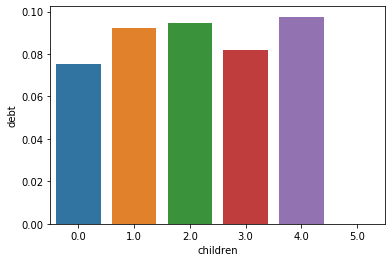

In [44]:
# смотрим не графике
seaborn.barplot(x = df['children'], y = df['debt'], ci=None)

**Вывод**

По полученным данным можно увидеть, что те, у кого нет детей, чаще остальных погашают кредиты в срок.

Данные с количеством детей 4 и 5 принимать к рассмотрению нецелесообразно, поскольку слишком маленький объем данных. Изменение в исходных данных хотя бы одного значения слишком существенно изменяет общую картину (например, для данных с 4 детьми - при 4 клиентах с просрочками из 41 - процент просрочек = 9.8, а если их будет 5 из 42 - процент просрочек станет 11.9).

Что касается остальных значений - увеличение количества детей приводит к увеличению количества просрочек, но как-только семья переходит в категорию многодетных (предположительно, получает дополнительные льготы от государства) - процент просрочек резко уменьшается.

Поэтому можно сказать, что количество детей клиента влияет на факт погашения кредита в срок.

### Зависимость между семейным положением и возвратом кредита в срок

In [45]:
# выводим сводную таблицу по семейному положению, возврату кредитов и проценту клиентов с просрочками
df_pivot_family = df.pivot_table(index=['family_status_id', 'family_status'],\
                                 columns = 'debt', values = 'total_income', aggfunc='count')

df_pivot_family['percent'] = df_pivot_family[1] / (df_pivot_family[1] + df_pivot_family[0]) * 100
df_pivot_family.round(1)

,debt,0,1,percent
family_status_id,family_status,,,
0,женат / замужем,11408,931,7.5
1,гражданский брак,3763,388,9.3
2,вдовец / вдова,896,63,6.6
3,в разводе,1110,85,7.1
4,Не женат / не замужем,2536,274,9.8


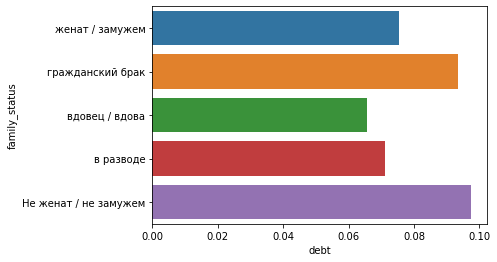

In [46]:
# смотрим на графике
seaborn.barplot(x = df['debt'], y = df['family_status'], ci=None)

**Вывод**

По полученным данным можно увидеть, что наименьший процент просрочек у категорий клиентов, которые раннее состояли в браке, но на текущий момент не состоят в нём, к этим категориям относятся "вдовец/вдова" и "в разводе". Люди без обязательств в семейных отношениях чаще нарушают обязательства и в кредитных отношениях =)

Как видим, семейное положение сильно влияет на возврат кредитов в срок.

### Зависимость между уровнем дохода и возвратом кредита в срок

In [47]:
# выводим сводную таблицу по уровню дохода, возврату кредитов и проценту клиентов с просрочками
df_pivot_income= df.pivot_table(index=['income_category'],columns = 'debt', values = 'children', aggfunc='count')
df_pivot_income['percent'] = df_pivot_income[1] / (df_pivot_income[1] + df_pivot_income[0]) * 100
df_pivot_income.round(1)

debt,0,1,percent
income_category,,,
1. низкий доход,4090,354,8.0
2. средний доход,6491,619,8.7
3. высокий доход,4335,403,8.5
4. очень высокий доход,3315,250,7.0
5. удивительно высокий доход,1368,106,7.2


При категоризации дохода мы разделили его по следующим категориям:
- клиенты с доходом менее 100000 - низкий доход
- клиенты с доходом менее 150000 - средний доход
- клиенты с доходом менее 200000 - высокий доход
- клиенты с доходом менее 300000 - очень высокий доход
- клиенты с доходом 300000 и более - удивительно высокий доход

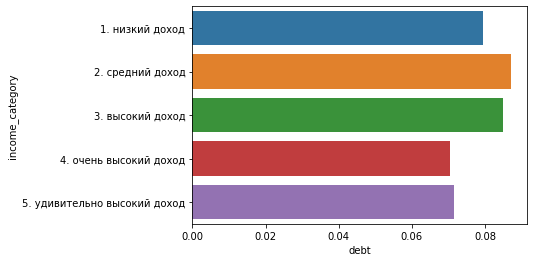

In [48]:
# смотрим на графике
seaborn.barplot(x = df['debt'], y = df['income_category'].sort_values(), ci=None)

**Вывод**

Из полученных данных можно увидеть, что наименьший процент просрочек у клиентов с доходом от 200000 (4 и 5 категории). Наибольшие просрочки у клиентов с доходом от 100000 до 200000 (2 и 3 категории). Клиенты с низким доходом (менее 100000) более ответственно относятся к срокам погашения кредита, но при этом, процент просрочек у них всё равно выше, чем у очень богатых клиентов.

Из этого можно сделать вывод, что лучше всего деньгами умеют пользоваться те, у кого их и так достаточно.

### Как разные цели кредита влияют на его возврат в срок?

In [49]:
# выводим сводную таблицу по целям кредита, возврату кредитов и проценту клиентов с просрочками
df_pivot_purpose= df.pivot_table(index=['purpose_category'],columns = 'debt', values = 'children', aggfunc='count')
df_pivot_purpose['percent'] = df_pivot_purpose[1] / (df_pivot_purpose[1] + df_pivot_purpose[0]) * 100
df_pivot_purpose.round(1)

debt,0,1,percent
purpose_category,,,
автомобиль,3879,400,9.3
недвижимость,9971,780,7.3
образование,3619,369,9.3
свадьбa,2130,183,7.9


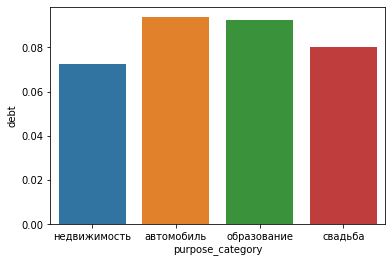

In [50]:
# смотрим на графике
seaborn.barplot(x = df['purpose_category'], y = df['debt'], ci=None)

**Вывод**

Из полученных данных можно увидеть, что наименьшее число просрочек встречается по кредитам, взятым на недвижимость. Кредиты, взятые на свадьбу также имеют невысокий процент просрочек, вероятно, это связано с тем, что кредиты взятые на свадьбу возвращают уже в семейном положении "замужем/женат", а, как мы видели на предыдущем графике - процент клиентов с просрочками в этой категории - всего 7.5%, что практически совпадает с процентом просрочек по кредитам на свадьбу.
Кредиты, взятые на автомобиль и образование имеют повышенный процент просрочек.


## Общий вывод

На основе проведенного анализа можно сделать вывод, что на процент просрочек по кредитам влияют все исследованные параметры клиентов. Таким образом, при построении модели кредитного скоринга необходимо учитывать все перечисленные параметры.

Идеальный клиент - клиент с доходом более 200000, женатый и без детей, оформляющий кредит на покупку недвижимости.<br>Самый неблагонадежный клиент- одинокий студент с двумя детьми, берущий кредит на автомобиль.